In [1]:
install.packages("rjags")
library(rjags)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



# Exercise 1

- Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.
- Considering the following to sets of observations taken over a fixed large time interval in two different corps:
    - y death soldiers 0 1 2 3 4 ≥ 5
    - n1 observations 109 65 22 3 1 0
    - n2 observations 144 91 32 11 2 0
    
(a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over
the measurement time. Determine the posterior mean, median and variance, and compute the 95%
credibility interval.

(b) assuming now a Jeffreys’ prior, g(λ) ∝ 1/√λ , with λ > 0
compute and plot the posterior distribution for λ, the death rate over the measurement time.
Determine the posterior mean, median and variance, and compute the 95% credibility interval.

Set,Prior,Mean,Variance,Median,CredibilityLimitInf,CredibilityLimitSup
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Uniform,0.6150000,0.0030750,0.6133341,0.5111251,0.7283408
1,Jeffrey,0.6125000,0.0030625,0.6108341,0.5088464,0.7256196
2,Uniform,0.7035714,0.1193005,0.7023813,0.6087487,0.8051570
2,Jeffrey,0.7017857,0.1198533,0.7005956,0.6070878,0.8032465


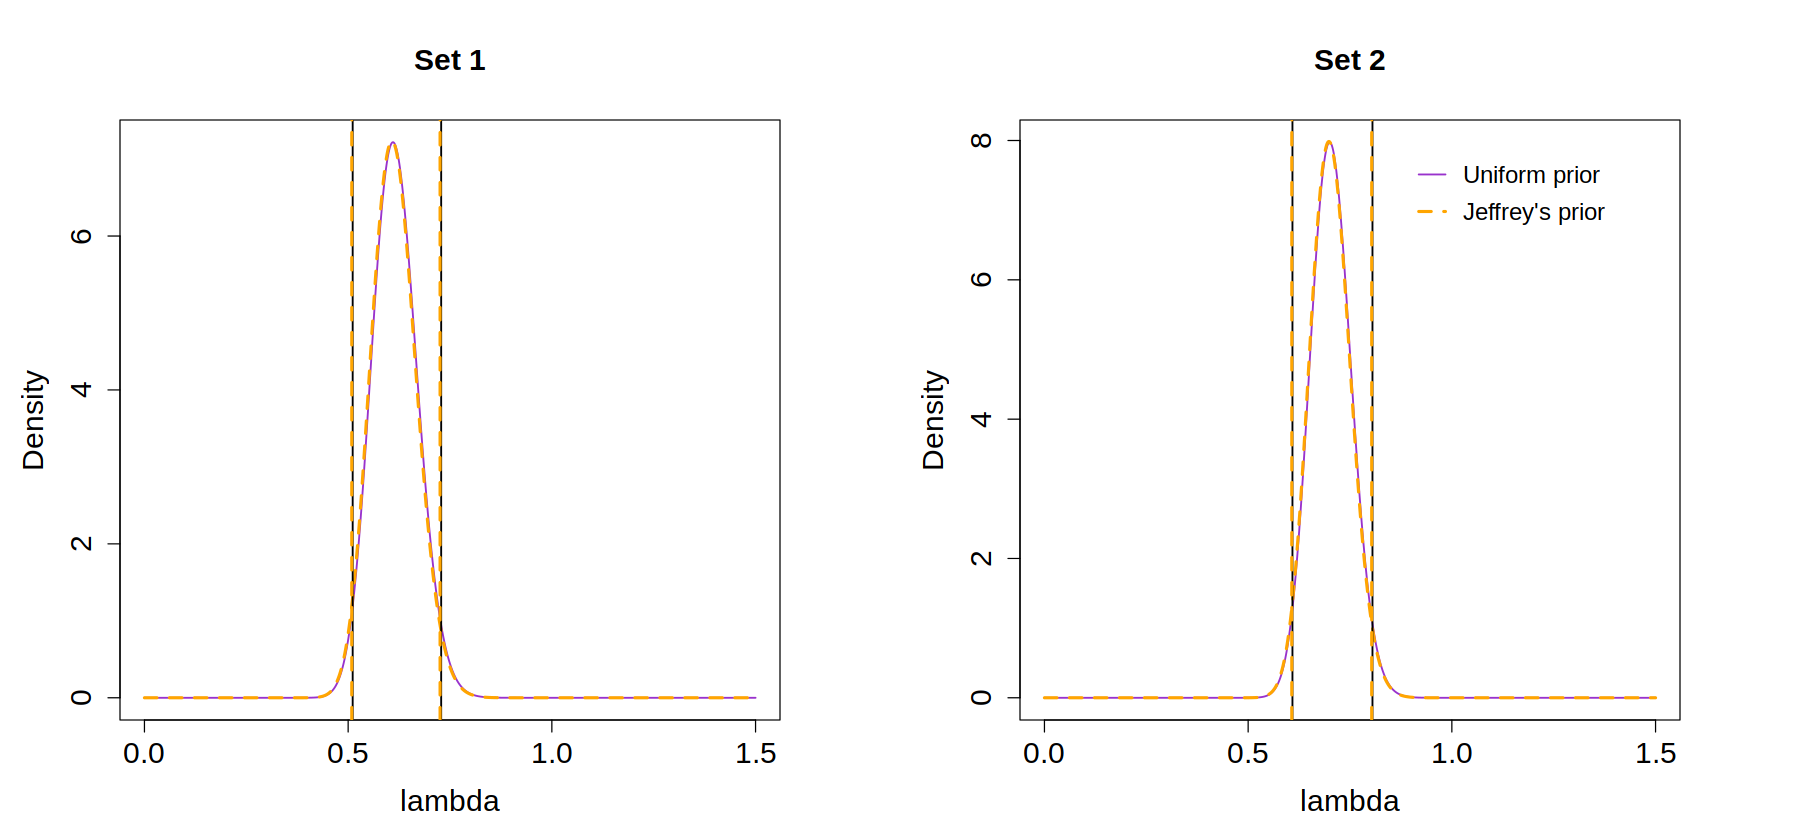

In [28]:
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)

limits <- c(0, 4)

# pdf and quantile function for the posterior with uniform prior

dpost.unif = function(mu, y){
    
    z <- seq(0,length(y)-1)
    dgamma(mu, shape = sum(z * y) + 1, rate = sum(y))
}

qpost.unif = function(mu, y){
    
    z <- seq(0,length(y)-1)
    qgamma(mu, shape = sum(z * y) + 1, rate = sum(y))
}


# pdf and quantile function for the posterior with Jeffrey's prior

dpost.jeff = function(mu, y){
    
    z = seq(0,length(y)-1)
    dgamma(mu, shape = sum(z * y) + 1/2, rate = sum(y))
}

qpost.jeff = function(mu, y){
    
    z = seq(0,length(y)-1)
    qgamma(mu, shape = sum(z * y) + 1/2, rate = sum(y))
}

mean   <- c()
mean   <- append(mean, integrate(function(x) x * dpost.unif(x, n1), lower=limits[1], upper=limits[2])$value)
mean   <- append(mean, integrate(function(x) x * dpost.jeff(x, n1), lower=limits[1], upper=limits[2])$value)
mean   <- append(mean, integrate(function(x) x * dpost.unif(x, n2), lower=limits[1], upper=limits[2])$value)
mean   <- append(mean, integrate(function(x) x * dpost.jeff(x, n2), lower=limits[1], upper=limits[2])$value)
                              
var    <- c()
var    <- append(var, integrate(function(x) x^2 * dpost.unif(x, n1), lower=limits[1], upper=limits[2])$value - mean[1]^2)
var    <- append(var, integrate(function(x) x^2 * dpost.jeff(x, n1), lower=limits[1], upper=limits[2])$value - mean[2]^2)
var    <- append(var, integrate(function(x) x^2 * dpost.unif(x, n2), lower=limits[1], upper=limits[2])$value - mean[1]^2)
var    <- append(var, integrate(function(x) x^2 * dpost.jeff(x, n2), lower=limits[1], upper=limits[2])$value - mean[2]^2)
                              
median <- c()
median <- append(median, qpost.unif(0.5, n1))
median <- append(median, qpost.jeff(0.5, n1))
median <- append(median, qpost.unif(0.5, n2))
median <- append(median, qpost.jeff(0.5, n2))

cred.limits <- c(0.025, 0.975)
crint <- c()
crint <- append(crint, qpost.unif(cred.limits,n1))
crint <- append(crint, qpost.jeff(cred.limits,n1))
crint <- append(crint, qpost.unif(cred.limits,n2))
crint <- append(crint, qpost.jeff(cred.limits,n2))
                               
                
# summarise the results in a dataframe
results <- data.frame(Set = c(1,1,2,2),
                     Prior = c('Uniform', 'Jeffrey'),
                     Mean  = mean,
                     Variance = var,
                     Median = median,
                     CredibilityLimitInf = crint[c(1,3,5,7)],
                     CredibilityLimitSup = crint[c(2,4,6,8)])
                               
# plot the posterior distribution
options(repr.plot.width=15, repr.plot.height=7)
# set the #columns, title size, axis label size, tick label size, margins within plots
par(mfrow = c(1, 2), cex.main = 1.5, cex.lab = 1.5, cex.axis = 1.5, mar = c(5, 5, 5, 5))    
                               
curve(dpost.unif(x, n1), from = 0, to = 1.5, n = 10^4, main = "Set 1", xlab = "lambda", ylab = "Density", lwd=1.5, col="darkorchid")
curve(dpost.jeff(x, n1), n = 10^4, col="orange", lty=2, add=T, lwd=2.5)
abline(v=crint[1], lw=1.5)
abline(v=crint[2], lw=1.5)
abline(v=crint[3], col='orange', lty=2, lw=2.5)
abline(v=crint[4], col='orange', lty=2, lw=2.5)
                               
curve(dpost.unif(x, n2), from = 0, to = 1.5, n = 10^4, main = "Set 2", xlab = "lambda", ylab = "Density", lwd=1.5, col="darkorchid")
curve(dpost.jeff(x, n2), n = 10^4, col="orange", lty=2, lwd=2.5, add=T)
abline(v=crint[5], lw=1.5)
abline(v=crint[6], lw=1.5)
abline(v=crint[7], col='orange', lty=2, lw=2.5)
abline(v=crint[8], col='orange', lty=2, lw=2.5)
         
legend(0.7, 8,                                         # Position
       legend = c("Uniform prior", "Jeffrey's prior"), # Vector with the name of each group
       col = c("darkorchid", "orange"),                # Color of lines or symbols
       lty = c(1,2),
       lw  = c(1.5,2.5),                               # Line type and width
       bty = "n",                                      # Box type (bty = "n" removes the box)
       cex = 1.2,                                      # Legend size
       seg.len = 0.3,                                  # Length of legend's segments
       x.intersp = 0.2, y.intersp = 1.2                # Distance between segments and labels and between labels
)
                               
results

# Exercise 2
- Solve Exercise 1 with a Markov Chain Monte Carlo. Build your own MCMC, using the functions introduced during lectures, or using a MCM library like JAGS.

In [3]:
install.packages("mcmcOutput", repos='http://cran.us.r-project.org')
library("mcmcOutput")
library(rjags)

Warning message:
“unable to access index for repository http://cran.us.r-project.org/src/contrib:
  download from 'http://cran.us.r-project.org/src/contrib/PACKAGES' failed”
Warning message:
“package ‘mcmcOutput’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [4]:
# Model uniform

model_unif <- "model{

# data likelihood
for (i in 1:length(X)){
    X[i] ~ dpois(lambda);
}

# Prior for lambda
lambda ~ dexp(0.000001);

}"

# Model Jeffrey's

model_jeff <- "model{

# data likelihood
for (i in 1:length(X)){
    X[i] ~ dpois(lambda);
}

# Prior for lambda
lambda ~ dbeta(1/2,1/2);

}"


In [5]:
# Infer #deaths from observations

data.pois = function(y){

    z <- seq(0,length(y)-1)
    return(rep(z, y))
}


# Data 

n1 <- c(109,65,22,3,1,0)
n2 <- c(144,91,32,11,2,0)

# Set plot properties
options(repr.plot.width=15, repr.plot.height=7)

pois.infer = function(n, unif=T) {
    
    # Model data
    data   <- NULL
    data$X <- data.pois(n)
    
    # Create JAGS models
    if (unif==T) {
        jm <- jags.model(file = textConnection(model_unif), data = data)
        cat("Uniform prior", "\n")
    }
    else {
        jm <- jags.model(file = textConnection(model_jeff), data = data)
        cat("Uniform prior", "\n")
    }
    
    # Update the Markov chain (Burn-in)
    update(jm, 10000)
    chain <- coda.samples(jm, c("lambda"), n.iter=10000)
    
    #Results
    cat("=========================================================","\n")
    cat("JAGS results:","\n")
    cat("=========================================================","\n")
    print(summary(chain))
    
    # Chain formatting
    chain.df <- as.data.frame(as.mcmc(chain))
    
    # Plots
    par(mfrow=c(1,2), mgp=c(2.0,0.8,0), mar=c(2,3,1,1), oma=0.1*c(1,1,1,1))
    plot(chain, col="darkorchid", lwd=1.5)

}

Here we can observe the results for:
- n1, uniform prior
- n2, uniform prior
- n1, Jeffrey's prior
- n2, Jeffrey's prior

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 1
   Total graph size: 202

Initializing model

Uniform prior 
JAGS results: 

Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.6143751      0.0552677      0.0005527      0.0005742 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.5116 0.5763 0.6125 0.6505 0.7278 



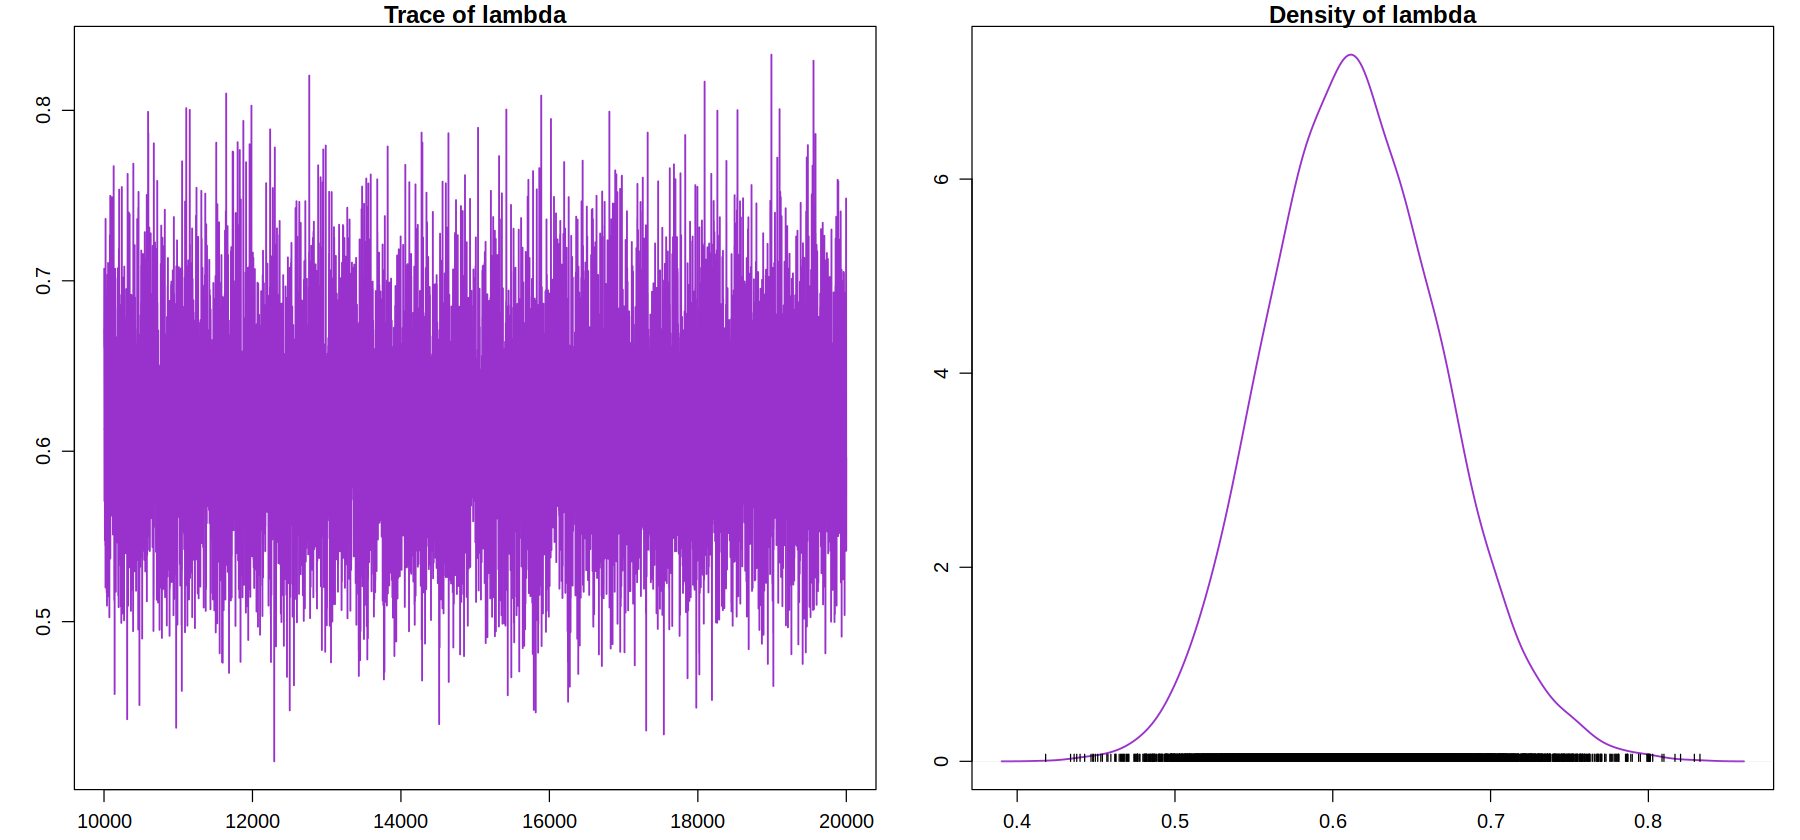

In [6]:
pois.infer(n1, unif=T)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 1
   Total graph size: 282

Initializing model

Uniform prior 
JAGS results: 

Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.7038595      0.0502520      0.0005025      0.0005025 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.6086 0.6691 0.7020 0.7380 0.8045 



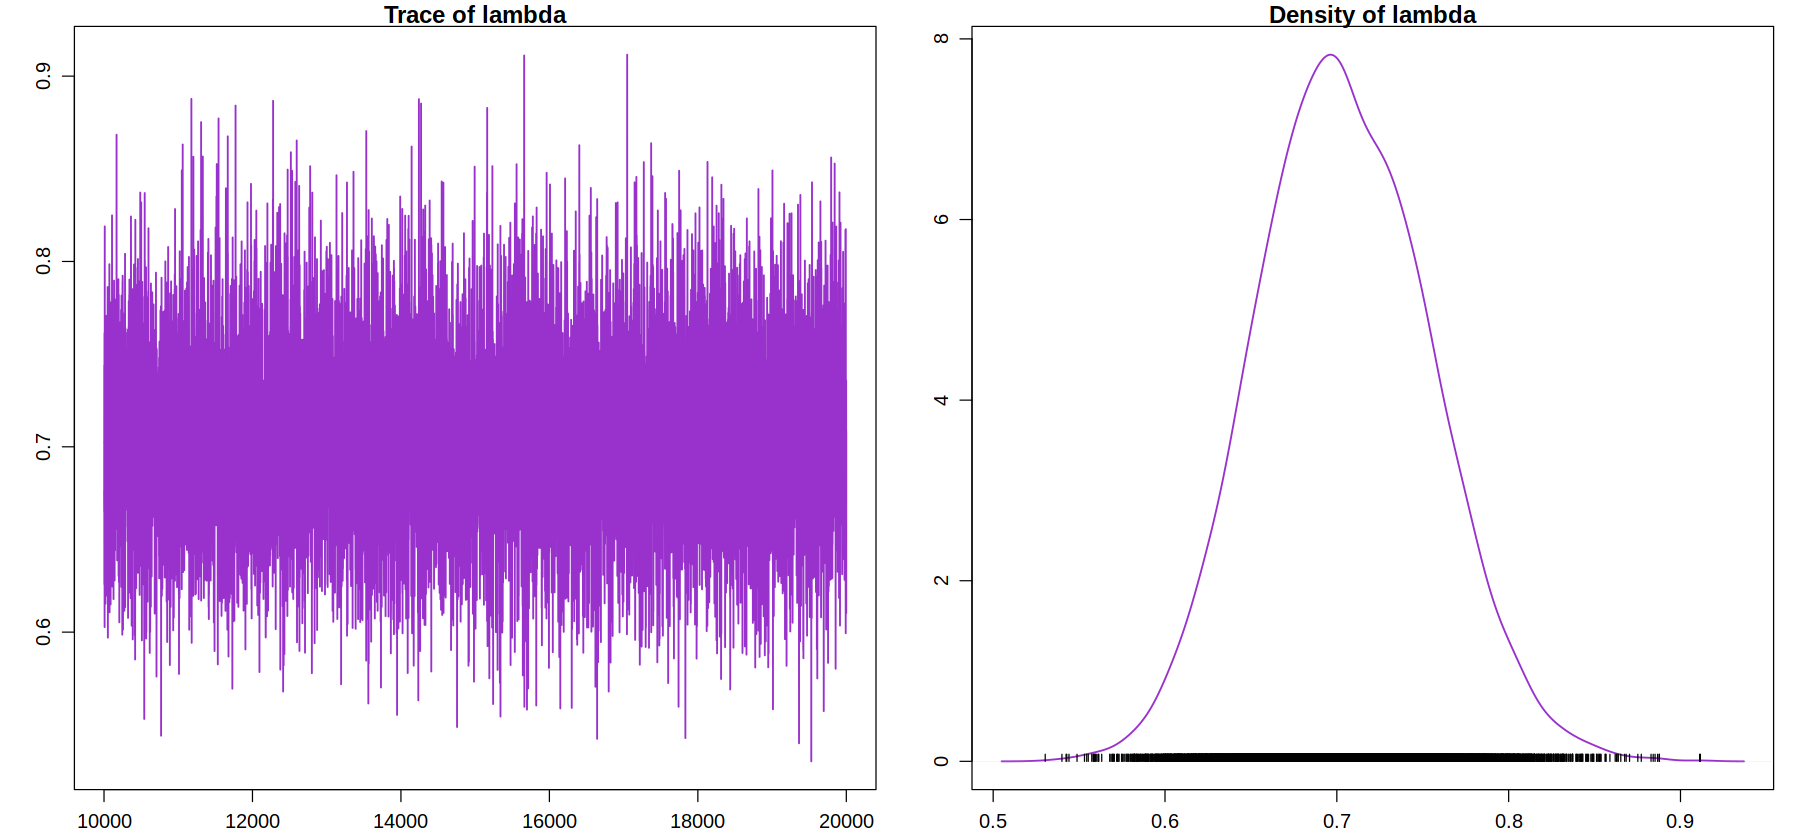

In [7]:
pois.infer(n2, unif=T)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 1
   Total graph size: 204

Initializing model

Uniform prior 
JAGS results: 

Iterations = 11001:21000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.6151055      0.0548971      0.0005490      0.0007341 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.5129 0.5768 0.6132 0.6512 0.7269 



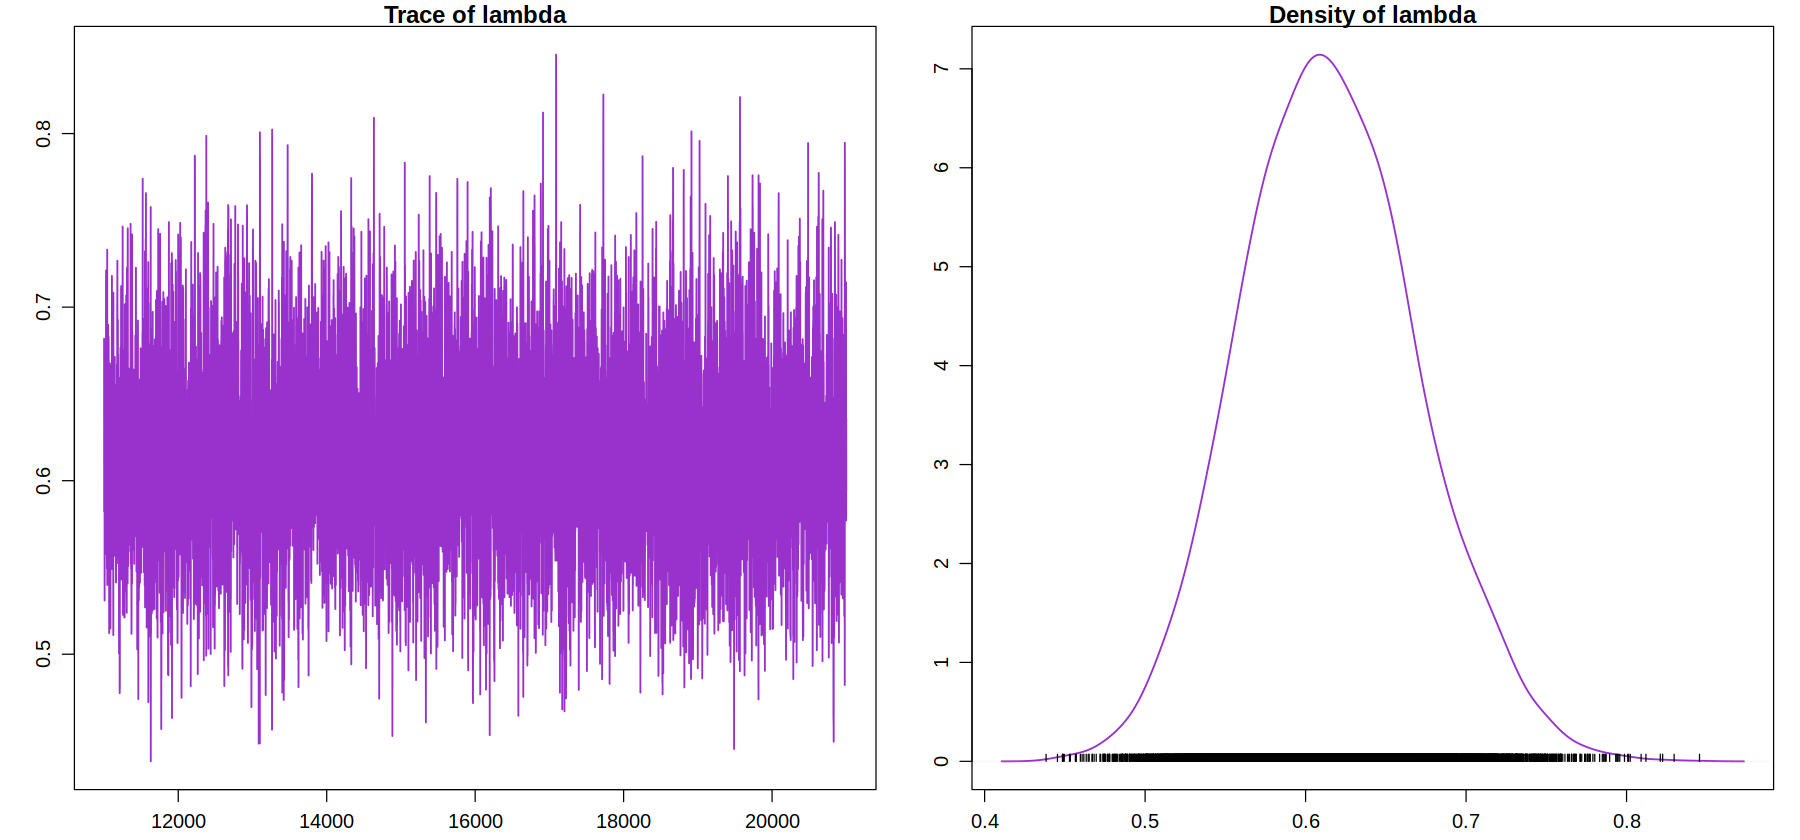

In [8]:
pois.infer(n1, unif=F)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 1
   Total graph size: 284

Initializing model

Uniform prior 
JAGS results: 

Iterations = 11001:21000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.7058551      0.0504979      0.0005050      0.0006393 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.6115 0.6709 0.7050 0.7389 0.8091 



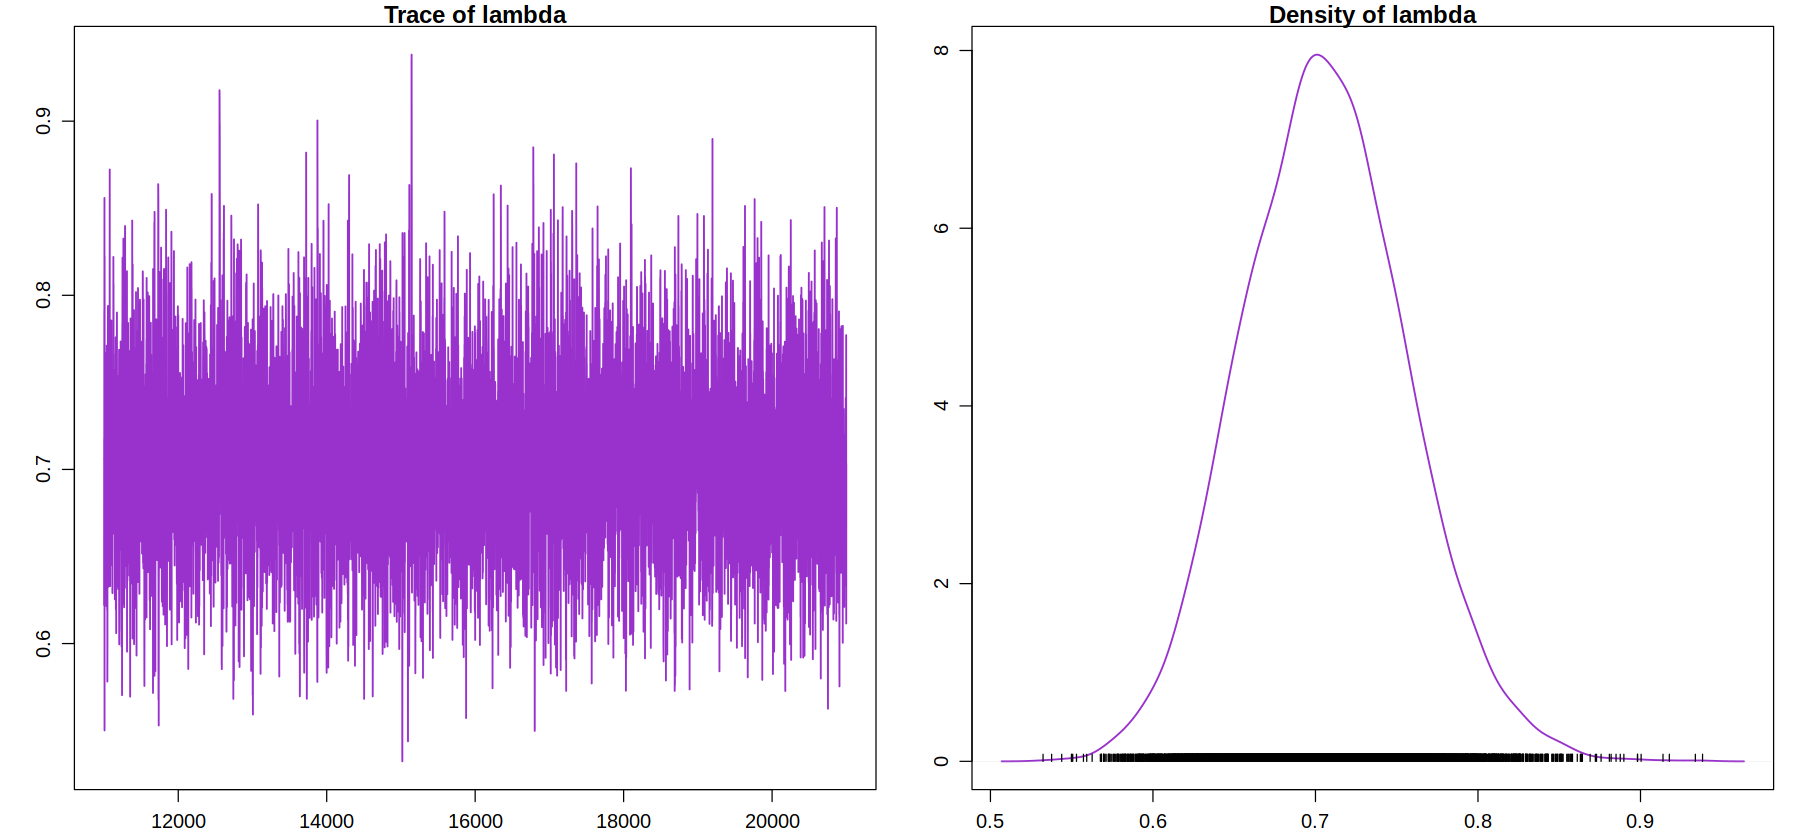

In [9]:
pois.infer(n2, unif=F)

# Exercise 3

- A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. <br> n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level.
- Indicating with p the probability that a sample of water taken from the stream has a high bacter X level,

a) Find the frequentist estimator for p <br> <br>
_Supposing a binomial distribution, the frequency estimator is given by_ p = y / n:

In [10]:
n <- 116
y <- 11

p <- y / n

cat(p)

0.09482759

b) Using a Beta(1, 10) prior for p, calculate and plot posterior distribution P(p|y)

c) Find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [11]:
# Define the prior density function
beta = function(p){dbeta(p, 1, 10)}

# Define the likelihood function               
likelihood = function(p, y, n){
    
    norm <- integrate(function(x) dbinom(y, n, x), lower = 0, upper = 1)[[1]]
    return (dbinom(y, n, p) / norm)
}
                     
# Define the pdf
dpost = function(prior){ function(p, y, n){
    
    likelihood(p, y, n) * prior(p) / integrate(function(x) likelihood(x, y, n) * prior(x), lower = 0, upper = 1)[[1]]
}}

# Define the posterior cumulative density function
ppost = function(prior){ function(upper, y, n){
    
    # let's define the function so that 'upper' can be a vector. This is needed to plot it
    values = c()
    for (i in 1:length(upper)){
                                                                               
            values <- append(values, integrate(function(x) dpost(prior)(x,y,n), lower=0, upper=upper[i])[[1]])
    }
    return (values)
}}
                                                                                          
# Define the quantile function (inverse of cumulative)
qpost = function(prior){ function(quant, y, n){
    
    # let's define the function so that 'upper' can be a vector. This is needed to plot it
    values <- c()
    for (i in 1:length(quant)){
                                                                                      
            values <- append(values, uniroot(function(x, z) ppost(prior)(x,y,n) - z, 
                                            interval = c(10^-12, 1), z = quant[i])$root)# extremely small offset for
                                                                                        # integration intervals to avoid
                                                                                        # problems of divergence
                                                                                        # cannot look for quantile smaller
                                                                                        # than this!
    }
    return (values)
}}

Mean: 0.09448819 
Std: 0.02585418 
Credibility interval: 0.05018921 0.1508329

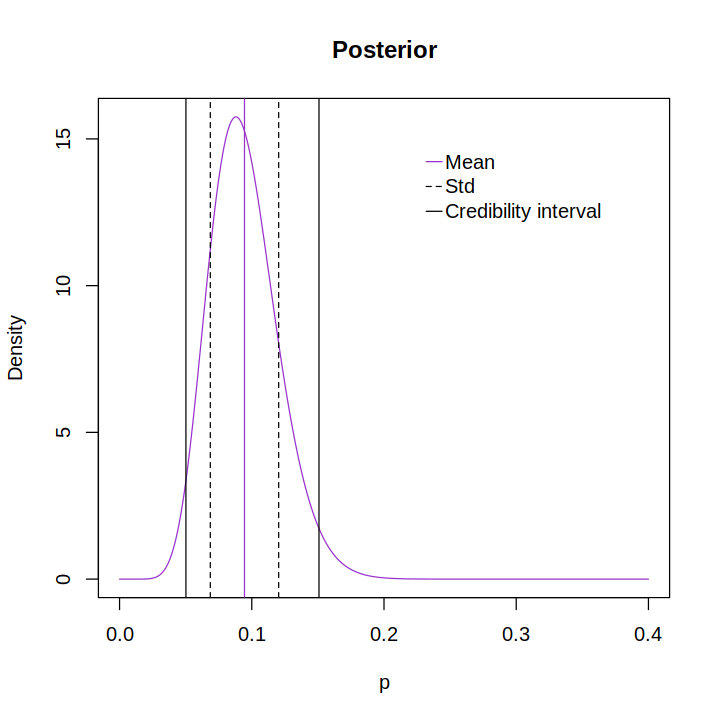

In [12]:
a <- 1
b <- 10

mean <- integrate(function(x) x * dpost(beta)(x, y, n), lower=0, upper=1)$value
std  <- sqrt(integrate(function(x) x^2 * dpost(beta)(x, y, n), lower=0, upper=1)$value - mean[1]^2)
                        
cred.limits <- c(0.025, 0.975)
crint       <- qpost(beta)(cred.limits, y, n)

options(repr.plot.width=6, repr.plot.height=6)
curve(dpost(beta)(x, y, n), from = 0, to = 0.4, n=1000, main = "Posterior", xlab = "p", ylab = "Density", col='darkorchid' )
abline(v=mean, col='darkorchid')
abline(v=mean-std, lty=2)
abline(v=mean+std, lty=2)
abline(v=crint[1])
abline(v=crint[2])
                        
legend(0.22, 15,                                          # Position
       legend = c("Mean", "Std", "Credibility interval"), # Vector with the name of each group
       col = c("darkorchid", "black", "black"),                  # Color of lines or symbols
       lty = c(1,2),                                      # Line type and width
       bty = "n",                                         # Box type (bty = "n" removes the box)
       cex = 1,                                           # Legend size
       seg.len = 1,                                       # Length of legend's segments
       x.intersp = 0.2, y.intersp = 1.2                   # Distance between segments and labels and between labels
)
                   
cat("Mean:", mean, "\nStd:", std, '\nCredibility interval:', crint)

d) Test the hypotesis $H_◦$: p = 0.1 versus $H_1$ : p != 0.1 at 5% level of significance with both the frequentist and bayesian approach

[1] "Accept null hypothesis"


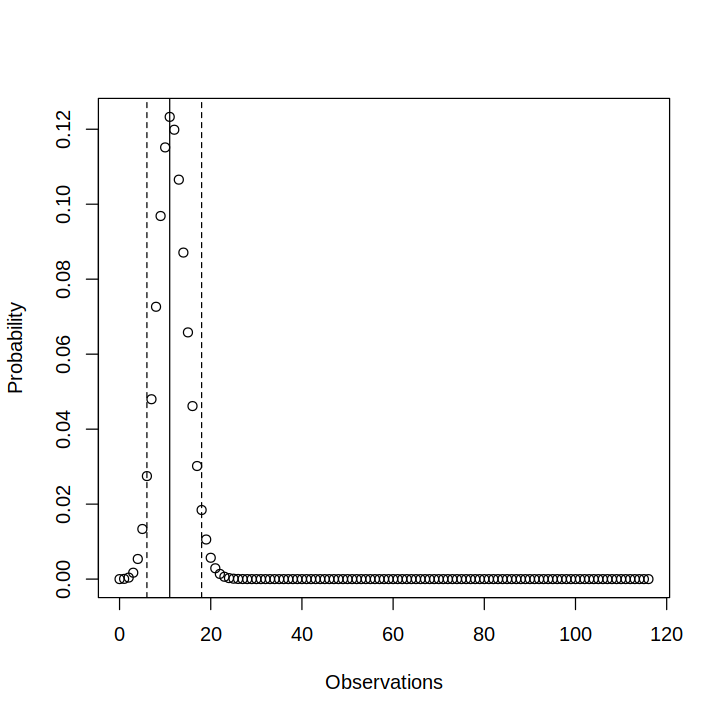

In [13]:
# frequentist approach
p0 <- 0.1
x  <- seq(0,n)
z  <- dbinom(x, size=n, prob=p0)

interval <- qbinom(c(0.025, 0.975), size=n, prob=p0)

# remain conservative on the interval
if ((y < interval[1])){print("Reject null hypothesis")
} else {print("Accept null hypothesis")}

plot(x, z, xlim=c(0,n), xlab="Observations", ylab="Probability")
abline(v = interval[1], lty=2)
abline(v = interval[2], lty=2)
abline(v = y)

_Bayesian approach: since p = 0.1 fall within the 95% credibility interval [0.05018921, 0.1508329], then we must accept the null hypothesis._ <br>

- a new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter X level <br>

e) find the frequentist estimator for p <br>

_Supposing a binomial distribution, the frequency estimator is given by_ p = y / n:

In [14]:
n <- 165
y <- 9

p <- y / n

cat(p)

0.05454545

f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one.

g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

Prior,Mean,Std,CredibilityLimitInf,CredibilityLimitSup
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
"Beta(1,10)",0.05681818,0.01740022,0.02773208,0.09539808
Previous post,0.07191781,0.01509307,0.04524570,0.10415085


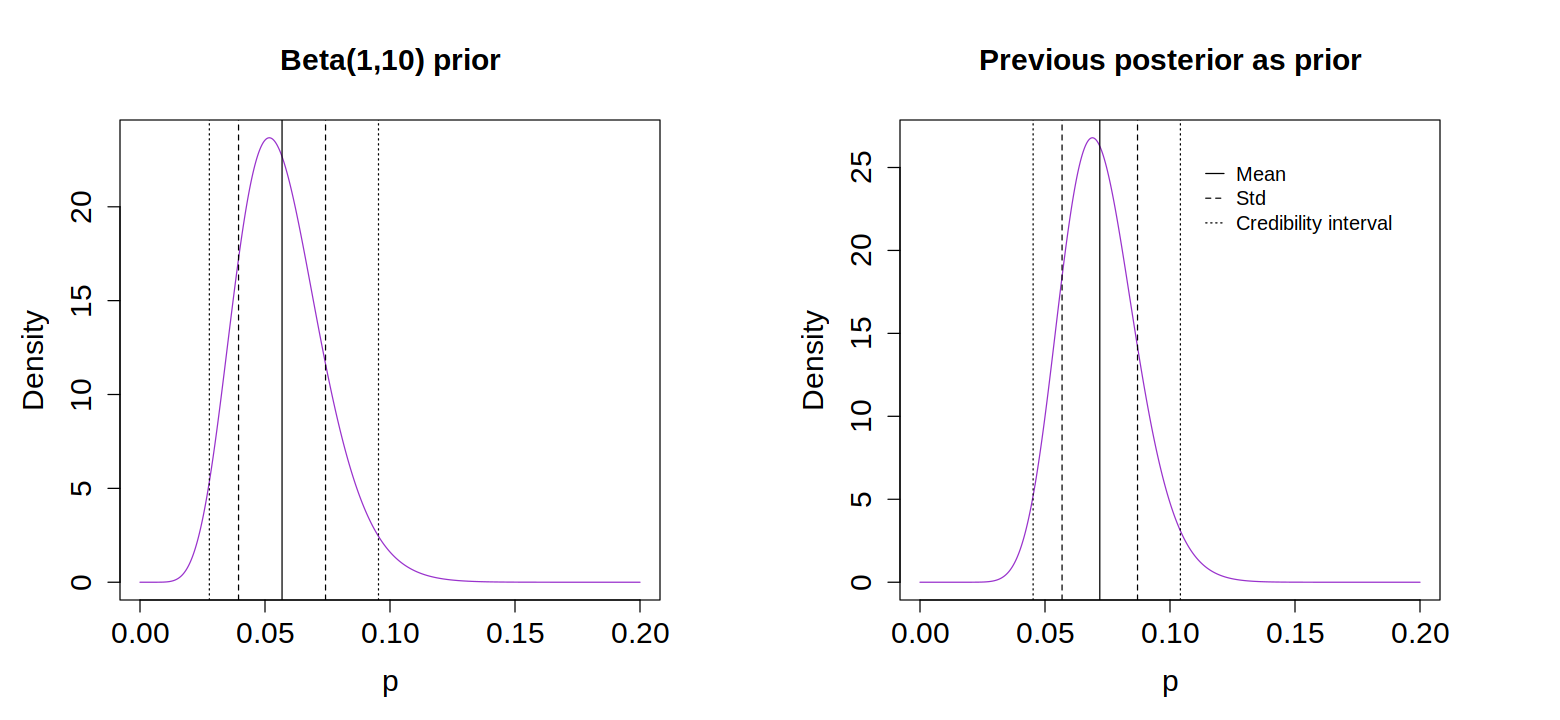

In [15]:
a <- 1
b <- 10

prev <- function(p){dpost(beta)(p, 11, 116)}

mean <- c()
mean <- append(mean, integrate(function(x) x   * dpost(beta)(x, y, n), lower=0, upper=1)$value)
mean <- append(mean, integrate(function(x) x   * dpost(prev)(x, y, n), lower=0, upper=1)$value)
                              
std  <- c()
std  <- append(std, sqrt(integrate(function(x) x^2 * dpost(beta)(x, y, n), lower=0, upper=1)$value - mean[1]^2))
std  <- append(std, sqrt(integrate(function(x) x^2 * dpost(prev)(x, y, n), lower=0, upper=1)$value - mean[2]^2))
                        
cred.limits <- c(0.025, 0.975)
crint       <- c()
crint       <- append(crint, qpost(beta)(cred.limits, y, n))
crint       <- append(crint, qpost(prev)(cred.limits, y, n))
                                  
# summarise the results in a dataframe
results <- data.frame(Prior = c('Beta(1,10)', 'Previous post'),
                     Mean  = mean,
                     Std = std,
                     CredibilityLimitInf = crint[c(1,3)],
                     CredibilityLimitSup = crint[c(2,4)])
                                  
# plot
par(mfrow = c(1, 2), cex.main = 1.5, cex.lab = 1.5, cex.axis = 1.5, mar = c(5, 5, 5, 5))    
options(repr.plot.width=13, repr.plot.height=6)
curve(dpost(beta)(x, y, n), from = 0, to = 0.2, n=1000, main = "Beta(1,10) prior", xlab = "p", ylab = "Density", col='darkorchid')
abline(v=mean[1])
abline(v=mean[1]-std[1], lty=2)
abline(v=mean[1]+std[1], lty=2)
abline(v=crint[1], lty=3)
abline(v=crint[2], lty=3)
                                  
curve(dpost(prev)(x, y, n), from = 0, to = 0.2, n=1000, main = "Previous posterior as prior", xlab = "p", ylab = "Density", col='darkorchid')
abline(v=mean[2])
abline(v=mean[2]-std[2], lty=2)
abline(v=mean[2]+std[2], lty=2)
abline(v=crint[3], lty=3)
abline(v=crint[4], lty=3)
                        
legend(0.09, 26,                                          # Position
       legend = c("Mean", "Std", "Credibility interval"), # Vector with the name of each group
#       col = c("red", "black", "black"),                 # Color of lines or symbols
       lty = c(1,2,3),                                    # Line type and width
       bty = "n",                                         # Box type (bty = "n" removes the box)
       cex = 1,                                           # Legend size
       seg.len = 0.3,                                     # Length of legend's segments
       x.intersp = 0.2, y.intersp = 1.2                   # Distance between segments and labels and between labels
)
                   
results

h) test the hypotesis H◦ : p = 0.1 versus H1 : p != 0.1 at 5% level of significance with both the frequentist and bayesian approach


_Bayesian approach:_
- _in the first case p = 0.1 falls out of the 95% credibility interval [0.02773208,	0.09539808], therefore we must reject the null hypotesis (i. e. p != 0.1 is valid)_
- _in the second case p = 0.1 falls within the 95% credibility interval [0.04524570, 0.10415085], therefore we must accept the null hypothesis._

[1] "Accept null hypothesis"


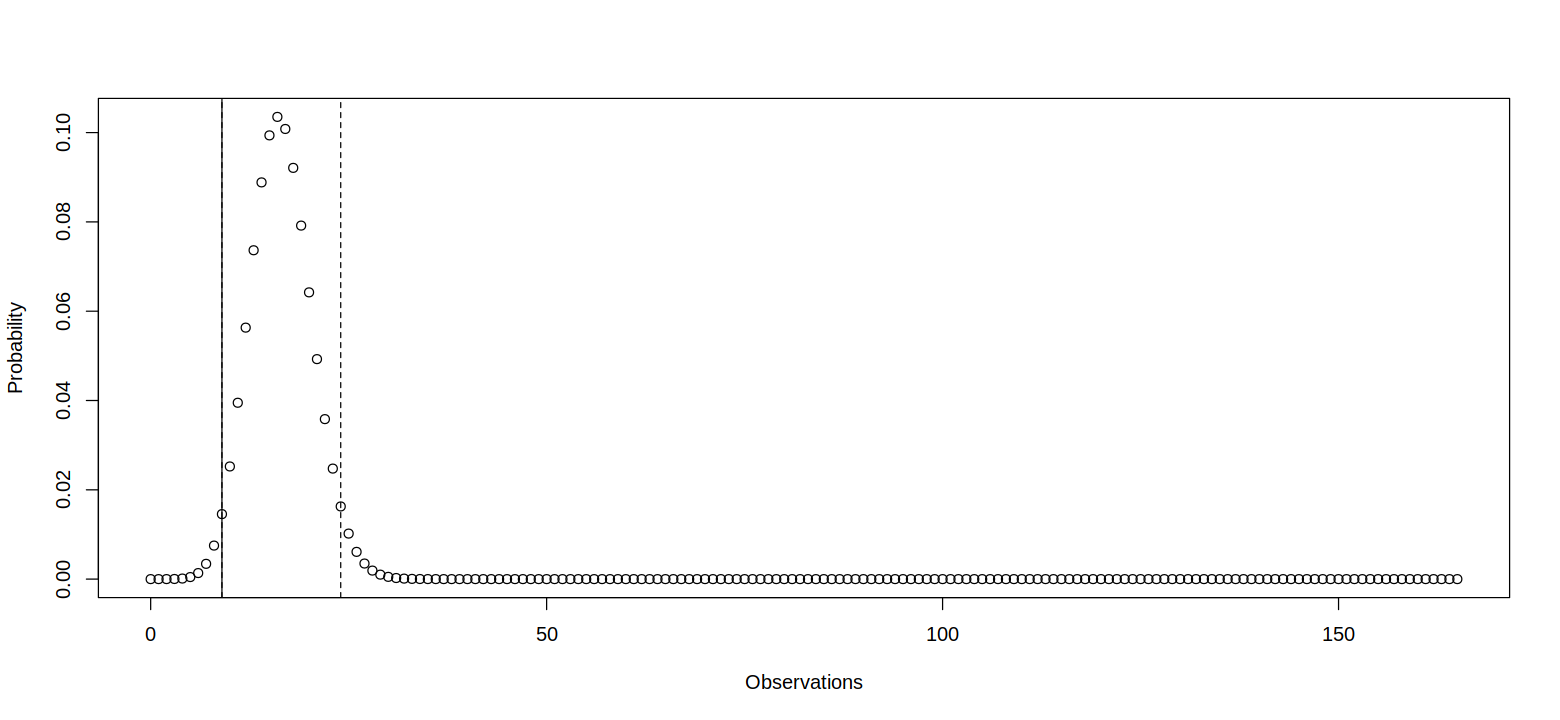

In [16]:
# frequentist approach
p0 <- 0.1
x  <- seq(0,n)
z  <-dbinom(x, size=n, prob=p0)

interval <- qbinom(c(0.025, 0.975), size=n, prob=p0)

# remain conservative on the interval
if ((y < interval[1])){print("Reject null hypothesis")
} else {print("Accept null hypothesis")}

plot(x, z, xlim=c(0,n), xlab="Observations", ylab="Probability")
abline(v = interval[1], lty=2)
abline(v = interval[2], lty=2)
abline(v = y)

# Exercise 4
- analyze the data of Exercise 3 and solve points b) and c) using a MCMC with JAGS

In [17]:
# Model 

model <- "model{

    # Likelihood
    y ~ dbinom(p,n) 

    # Prior
    p ~ dbeta(alpha, beta)
    alpha <- 1 
    beta  <- 10

}"


In [18]:
# Data 
n <- 116 # sample size
y <- 11  # number of successes

# Set plot properties
options(repr.plot.width=15, repr.plot.height=7)

bin.infer = function(n, y) {
    
    # Model data
    data   <- list(y = y, n = n)
    
    # Create JAGS models
    jm <- jags.model(file = textConnection(model), data = data)
    
    # Update the Markov chain (Burn-in)
    update(jm, 10000)
    chain <- coda.samples(jm, c("p"), n.iter=10000)
    
    # Results
    cat("=========================================================","\n")
    cat("JAGS results:","\n")
    cat("=========================================================","\n")
    print(summary(chain))
    
    # Chain formatting
    chain.df <- as.data.frame(as.mcmc(chain))
    
    # Plots
    par(mfrow=c(1,2), mgp=c(2.0,0.8,0), mar=c(2,3,1,1), oma=0.1*c(1,1,1,1))
    plot(chain, col="darkorchid", lwd=1.5)

}

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model

JAGS results: 

Iterations = 11001:21000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.0946315      0.0256626      0.0002566      0.0003527 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.05058 0.07629 0.09262 0.11072 0.15049 



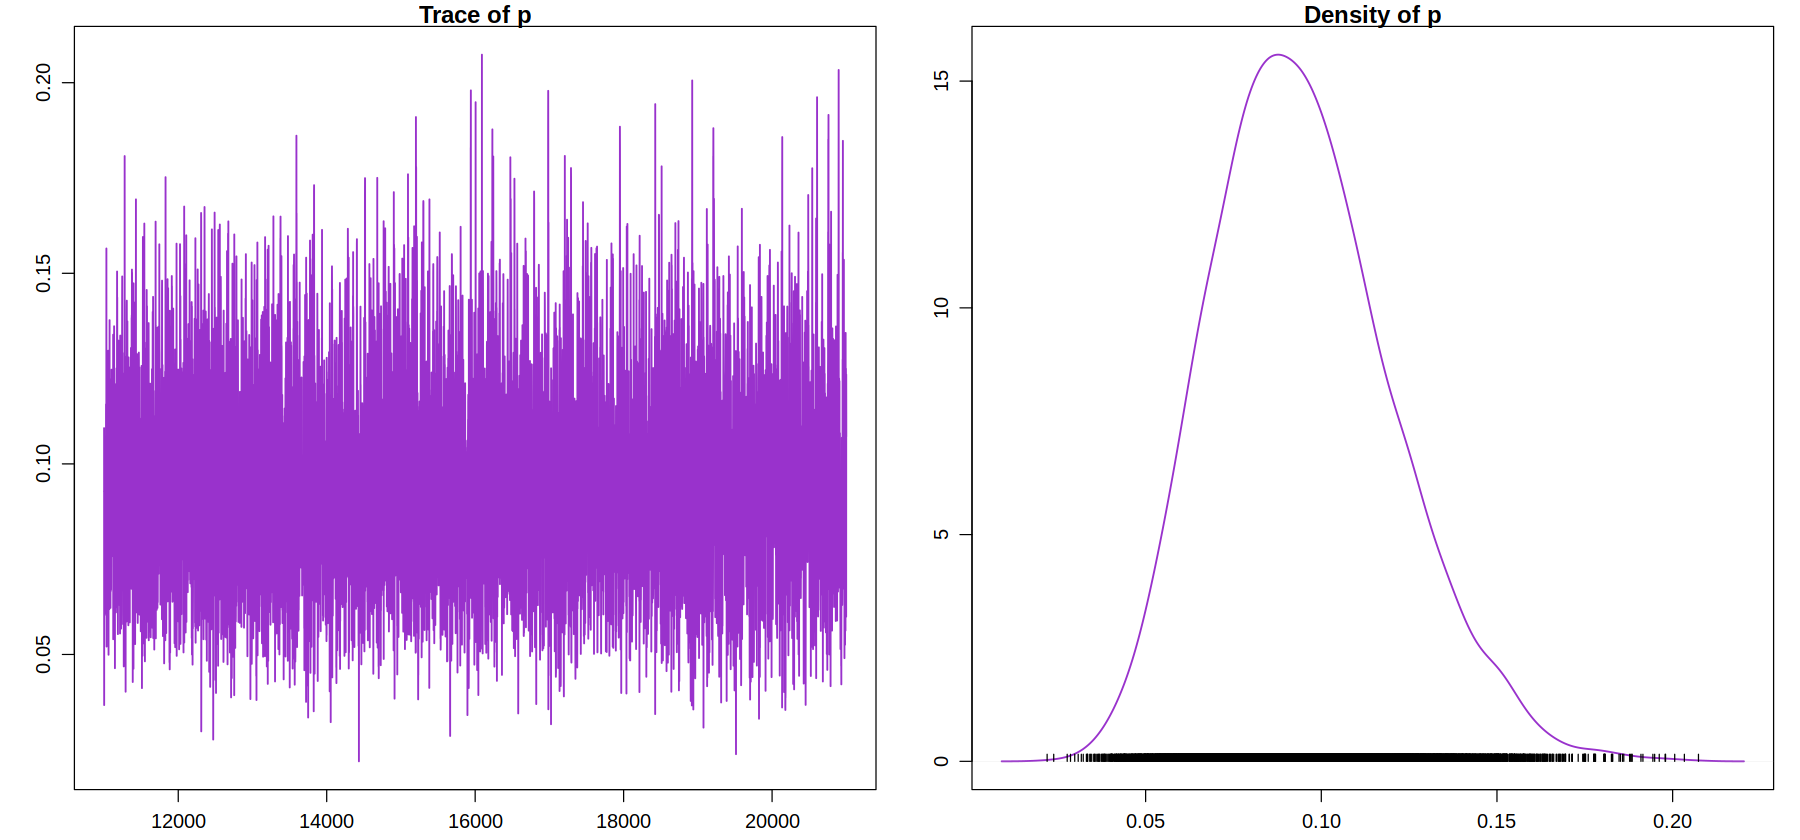

In [19]:
bin.infer(n,y)